In [1]:
import numpy as np
import pandas as pd 
import matplotlib.pyplot as plt
import seaborn as sns
import joblib
import pickle
import warnings
warnings.filterwarnings('ignore')

In [2]:
data=pd.read_csv("https://raw.githubusercontent.com/shobhitsrivastava-ds/ML-MT-WebApp/master/cancer.csv")
data.head()

,id,diagnosis,radius_mean,texture_mean,perimeter_mean,area_mean,smoothness_mean,compactness_mean,concavity_mean,concave points_mean,...,texture_worst,perimeter_worst,area_worst,smoothness_worst,compactness_worst,concavity_worst,concave points_worst,symmetry_worst,fractal_dimension_worst,Unnamed: 32
0,842302,M,17.99,10.38,122.80,1001.0,0.11840,0.27760,0.3001,0.14710,...,17.33,184.60,2019.0,0.1622,0.6656,0.7119,0.2654,0.4601,0.11890,NaN
1,842517,M,20.57,17.77,132.90,1326.0,0.08474,0.07864,0.0869,0.07017,...,23.41,158.80,1956.0,0.1238,0.1866,0.2416,0.1860,0.2750,0.08902,NaN
2,84300903,M,19.69,21.25,130.00,1203.0,0.10960,0.15990,0.1974,0.12790,...,25.53,152.50,1709.0,0.1444,0.4245,0.4504,0.2430,0.3613,0.08758,NaN
3,84348301,M,11.42,20.38,77.58,386.1,0.14250,0.28390,0.2414,0.10520,...,26.50,98.87,567.7,0.2098,0.8663,0.6869,0.2575,0.6638,0.17300,NaN
4,84358402,M,20.29,14.34,135.10,1297.0,0.10030,0.13280,0.1980,0.10430,...,16.67,152.20,1575.0,0.1374,0.2050,0.4000,0.1625,0.2364,0.07678,NaN


In [3]:
print(data.info())


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 569 entries, 0 to 568
Data columns (total 33 columns):
 #   Column                   Non-Null Count  Dtype  
---  ------                   --------------  -----  
 0   id                       569 non-null    int64  
 1   diagnosis                569 non-null    object 
 2   radius_mean              569 non-null    float64
 3   texture_mean             569 non-null    float64
 4   perimeter_mean           569 non-null    float64
 5   area_mean                569 non-null    float64
 6   smoothness_mean          569 non-null    float64
 7   compactness_mean         569 non-null    float64
 8   concavity_mean           569 non-null    float64
 9   concave points_mean      569 non-null    float64
 10  symmetry_mean            569 non-null    float64
 11  fractal_dimension_mean   569 non-null    float64
 12  radius_se                569 non-null    float64
 13  texture_se               569 non-null    float64
 14  perimeter_se             5

In [4]:
data.isnull().sum()

id                           0
diagnosis                    0
radius_mean                  0
texture_mean                 0
perimeter_mean               0
area_mean                    0
smoothness_mean              0
compactness_mean             0
concavity_mean               0
concave points_mean          0
symmetry_mean                0
fractal_dimension_mean       0
radius_se                    0
texture_se                   0
perimeter_se                 0
area_se                      0
smoothness_se                0
compactness_se               0
concavity_se                 0
concave points_se            0
symmetry_se                  0
fractal_dimension_se         0
radius_worst                 0
texture_worst                0
perimeter_worst              0
area_worst                   0
smoothness_worst             0
compactness_worst            0
concavity_worst              0
concave points_worst         0
symmetry_worst               0
fractal_dimension_worst      0
Unnamed:

In [5]:
data.drop(["Unnamed: 32"],axis="columns",inplace=True)
data.drop(["id"],axis="columns",inplace=True)
diagnosis=pd.get_dummies(data["diagnosis"])
data_new=pd.concat([data,diagnosis],axis="columns")
data_new.drop(["diagnosis","B"],axis="columns",inplace=True)
data_new.head()

,radius_mean,texture_mean,perimeter_mean,area_mean,smoothness_mean,compactness_mean,concavity_mean,concave points_mean,symmetry_mean,fractal_dimension_mean,...,texture_worst,perimeter_worst,area_worst,smoothness_worst,compactness_worst,concavity_worst,concave points_worst,symmetry_worst,fractal_dimension_worst,M
0,17.99,10.38,122.80,1001.0,0.11840,0.27760,0.3001,0.14710,0.2419,0.07871,...,17.33,184.60,2019.0,0.1622,0.6656,0.7119,0.2654,0.4601,0.11890,1
1,20.57,17.77,132.90,1326.0,0.08474,0.07864,0.0869,0.07017,0.1812,0.05667,...,23.41,158.80,1956.0,0.1238,0.1866,0.2416,0.1860,0.2750,0.08902,1
2,19.69,21.25,130.00,1203.0,0.10960,0.15990,0.1974,0.12790,0.2069,0.05999,...,25.53,152.50,1709.0,0.1444,0.4245,0.4504,0.2430,0.3613,0.08758,1
3,11.42,20.38,77.58,386.1,0.14250,0.28390,0.2414,0.10520,0.2597,0.09744,...,26.50,98.87,567.7,0.2098,0.8663,0.6869,0.2575,0.6638,0.17300,1
4,20.29,14.34,135.10,1297.0,0.10030,0.13280,0.1980,0.10430,0.1809,0.05883,...,16.67,152.20,1575.0,0.1374,0.2050,0.4000,0.1625,0.2364,0.07678,1


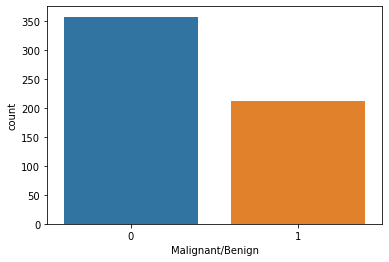

In [6]:
data_new.rename(columns={"M":"Malignant/Benign"},inplace=True)
X=data_new.drop(["Malignant/Benign"],axis="columns")
Y=data_new[['Malignant/Benign']]
sns.countplot(data_new['Malignant/Benign'])

In [7]:
from sklearn.model_selection import train_test_split
x_train,x_test,y_train,y_test=train_test_split(X,Y,test_size=0.35,random_state=101)
from sklearn.ensemble import RandomForestClassifier
rf=RandomForestClassifier()
rf.fit(x_train,y_train)
y_pred_rf=rf.predict(x_test)
from sklearn.metrics import classification_report
print(classification_report(y_pred_rf,y_test))

              precision    recall  f1-score   support

           0       0.96      0.96      0.96       125
           1       0.93      0.93      0.93        75

    accuracy                           0.95       200
   macro avg       0.95      0.95      0.95       200
weighted avg       0.95      0.95      0.95       200



In [8]:
rf.feature_importances_

array([0.06558675, 0.0159454 , 0.04322255, 0.06979569, 0.00472153,
       0.00348748, 0.03396024, 0.10802869, 0.00527323, 0.00384062,
       0.00924391, 0.00324964, 0.01736331, 0.0237986 , 0.00210079,
       0.0040348 , 0.00474908, 0.00296158, 0.00534916, 0.00480498,
       0.12549765, 0.01350495, 0.09744059, 0.10163088, 0.01064972,
       0.01995239, 0.03294949, 0.14913436, 0.01353295, 0.00418898])

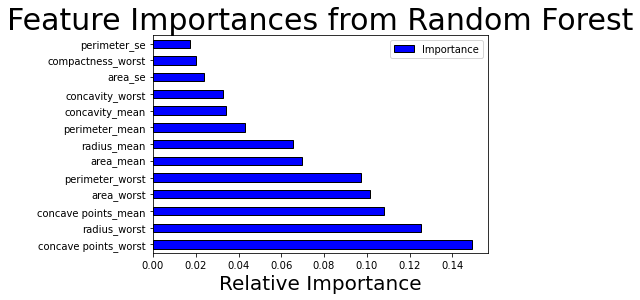

In [9]:
feature_results = pd.DataFrame({'Feature': list(x_train.columns), 
                                'Importance': rf.feature_importances_})
feature_results = feature_results.sort_values('Importance', ascending = False).reset_index(drop=True)

feature_results['Importance']>0.016
feature_results.loc[:12, :].plot(x = 'Feature', y = 'Importance', 
                                 edgecolor = 'k',
                                 kind='barh', color = 'blue');
plt.xlabel('Relative Importance', size = 20); plt.ylabel('')
plt.title('Feature Importances from Random Forest', size = 30);

In [10]:
data_new.drop(["texture_mean","perimeter_se","texture_worst","compactness_mean","radius_se",
               "concave points_se","concavity_se","fractal_dimension_worst","symmetry_mean",
               "fractal_dimension_se","smoothness_mean","smoothness_se","texture_se","compactness_se",
               "fractal_dimension_mean","symmetry_se"],axis="columns",inplace=True)

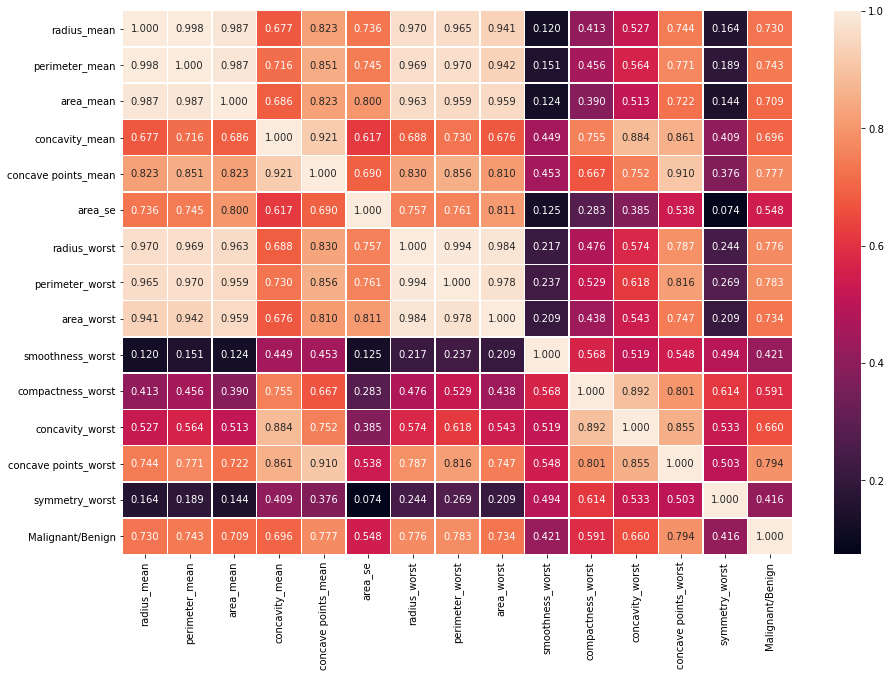

In [11]:
data_new.head()
data_new.corr()
cor_mat=data_new.corr()
fig,ax=plt.subplots(figsize=(15,10))
sns.heatmap(cor_mat,annot=True,linewidths=0.5,fmt=".3f")

In [12]:
X_new=data_new.drop(["Malignant/Benign"],axis="columns")
Y_new=data_new[['Malignant/Benign']]
from sklearn.model_selection import train_test_split
x_train_new,x_test_new,y_train_new,y_test_new=train_test_split(X_new,Y_new,test_size=0.35,random_state=101)

In [13]:
from sklearn.metrics import accuracy_score,recall_score,f1_score,precision_score,roc_auc_score,confusion_matrix

def evaluation(Y_test,Y_pred):
  acc=accuracy_score(Y_test,Y_pred)
  rcl=recall_score(Y_test,Y_pred)
  f1=f1_score(Y_test,Y_pred)
 

  metric_dict={'accuracy': round(acc,3),
               'recall': round(rcl,3),
               'F1 score': round(f1,3),
               
              }

  return print(metric_dict)


In [14]:
from sklearn.neighbors import KNeighborsClassifier
knn_mod=  KNeighborsClassifier()
knn_mod.fit(x_train_new,y_train_new)
knn_y_pred=knn_mod.predict(x_test_new)
knn_score=knn_mod.score(x_test_new,y_test_new)
evaluation(y_test,knn_y_pred)

{'accuracy': 0.92, 'recall': 0.88, 'F1 score': 0.892}


In [15]:
np.random.seed(42)
from sklearn.linear_model import LogisticRegression
lr_mod=LogisticRegression()
lr_mod.fit(x_train_new,y_train_new)
y_pred_lr=lr_mod.predict(x_test_new)
lr_score=lr_mod.score(x_test_new,y_test_new)
evaluation(y_test_new,y_pred_lr)

{'accuracy': 0.925, 'recall': 0.867, 'F1 score': 0.897}


In [16]:
np.random.seed(411)
from sklearn.ensemble import RandomForestClassifier
rf_mod=RandomForestClassifier()
rf_mod.fit(x_train_new,y_train_new)
y_pred_rf=rf_mod.predict(x_test_new)
rf_score=rf_mod.score(x_test_new,y_test_new)
evaluation(y_test_new,y_pred_rf)

{'accuracy': 0.94, 'recall': 0.907, 'F1 score': 0.919}


In [17]:
np.random.seed(111)
from sklearn.tree import DecisionTreeClassifier
mode_tree=DecisionTreeClassifier()
mode_tree.fit(x_train_new,y_train_new)
y_pred_tree=mode_tree.predict(x_test_new)
tree_score=mode_tree.score(x_test_new,y_test_new)
evaluation(y_test_new,y_pred_tree)

{'accuracy': 0.91, 'recall': 0.853, 'F1 score': 0.877}


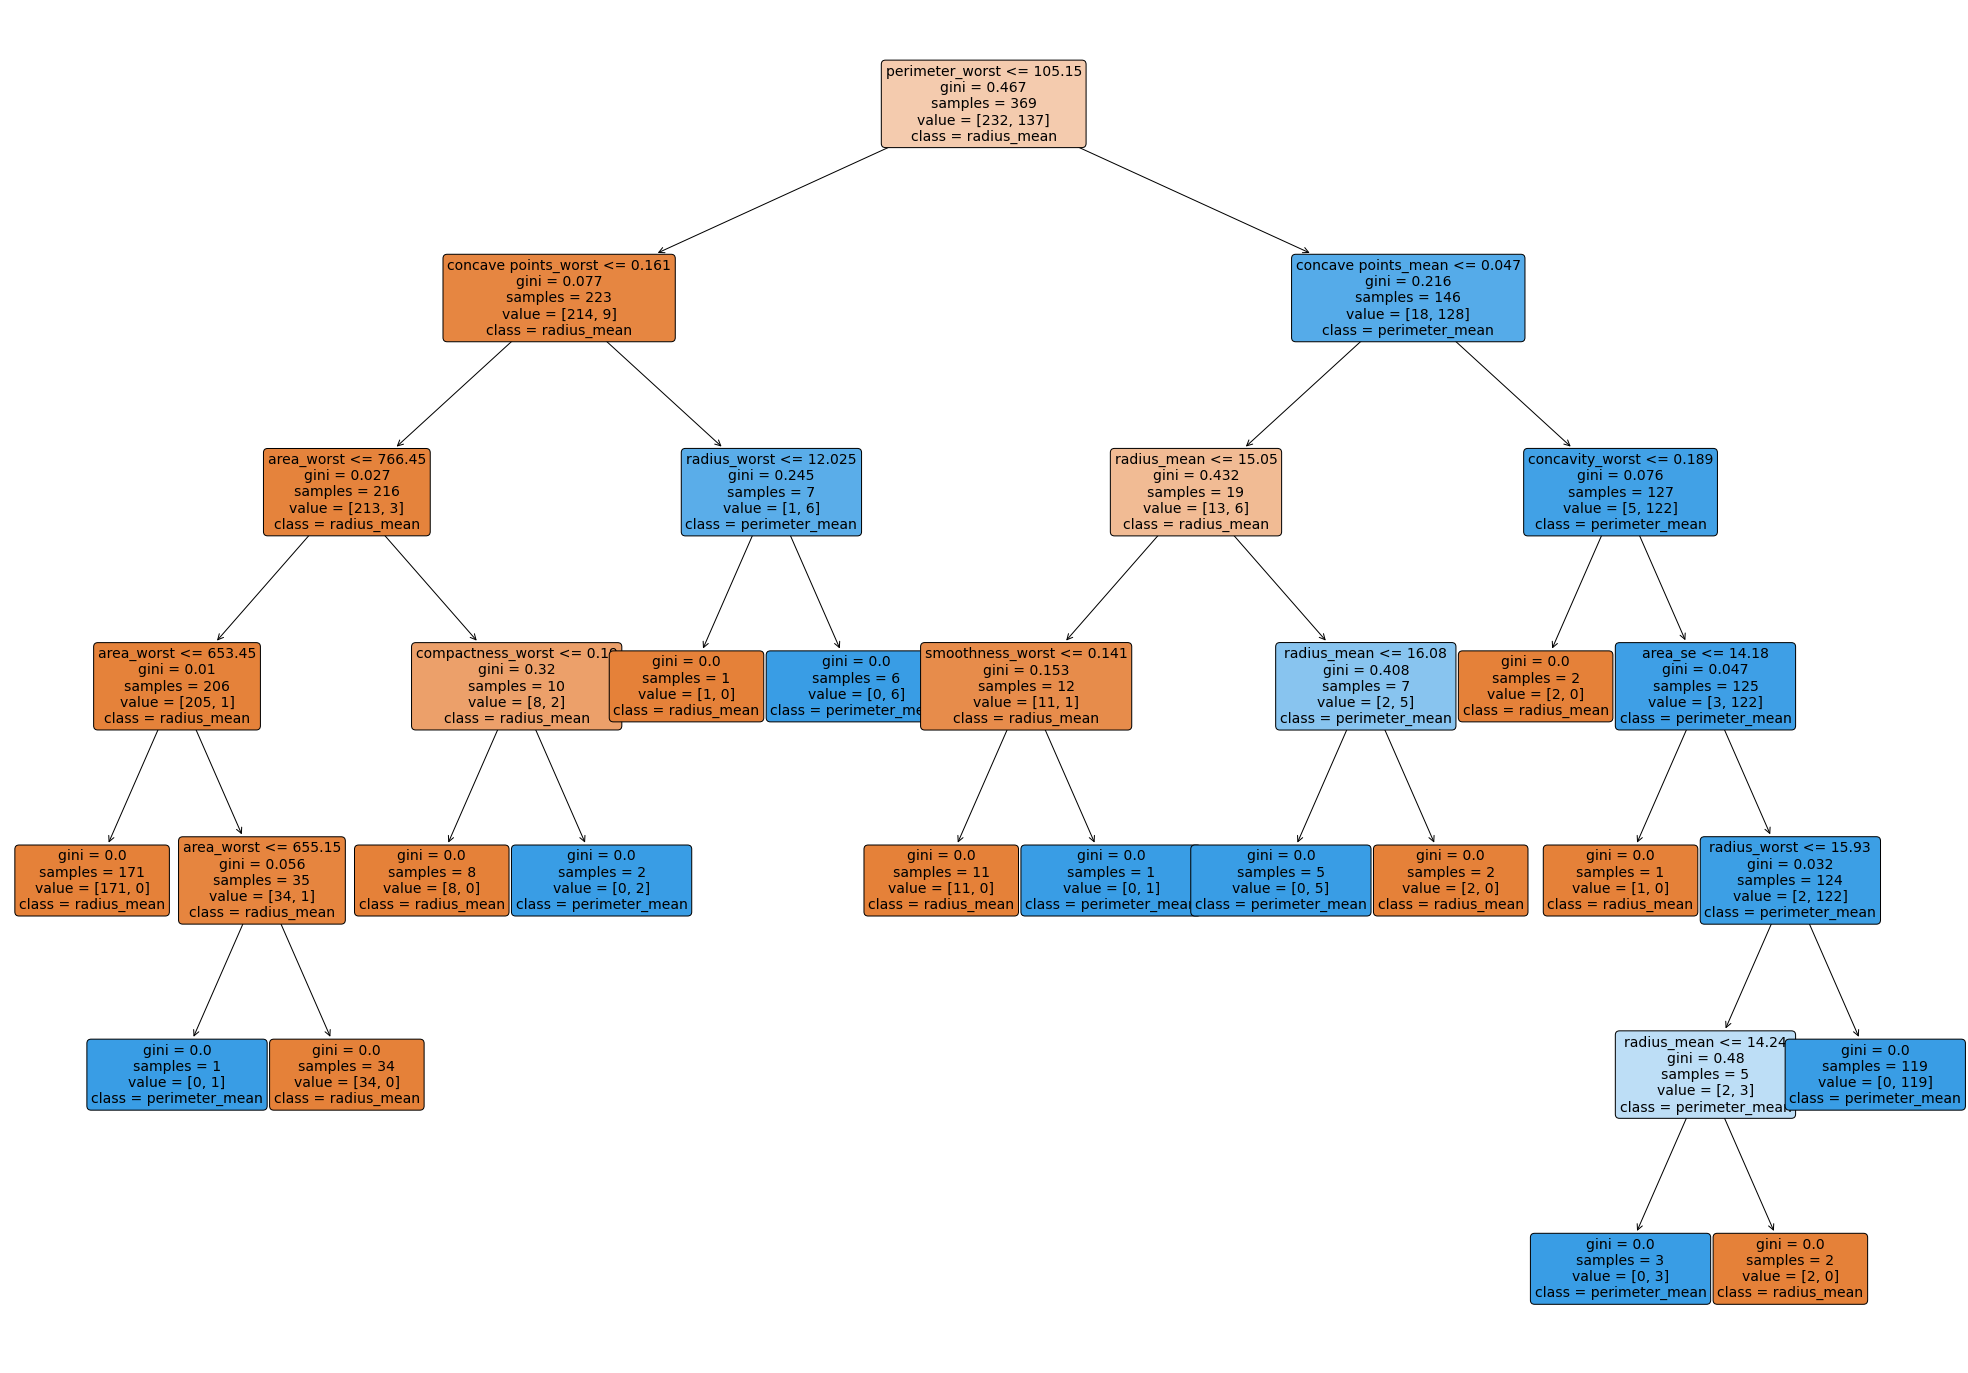

In [18]:
from sklearn.tree import plot_tree
plt.figure(figsize=(35,25))
a = plot_tree(mode_tree, 
              feature_names=x_train_new.columns, 
              class_names=x_train_new.columns, 
              filled=True, 
              rounded=True, 
              fontsize=14)


In [19]:
from sklearn.ensemble import GradientBoostingClassifier
GBC=GradientBoostingClassifier()
GBC.fit(x_train_new,y_train_new)
y_pred_GBC=GBC.predict(x_test_new)
GBC_score=GBC.score(x_test_new,y_test_new)
evaluation(y_test_new,y_pred_GBC)

{'accuracy': 0.93, 'recall': 0.907, 'F1 score': 0.907}


In [20]:
from sklearn.svm import SVC
svc=SVC()
svc.fit(x_train_new,y_train_new)
y_pred_svc=svc.predict(x_test_new)
svc_score=svc.score(x_test_new,y_test_new)
evaluation(y_test_new,y_pred_svc)

{'accuracy': 0.91, 'recall': 0.813, 'F1 score': 0.871}


                       Model  Accuracy
0        Logistic Regression      92.5
1              Random Forest      94.0
2              Decision Tree      91.0
3          Gradient Boosting      93.0
4  Support Vector Classifier      91.0
5        K-Nearest Neighbour      92.0


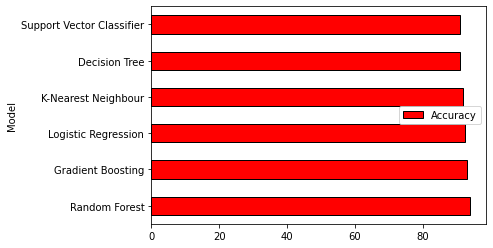

In [21]:
model_comparison = pd.DataFrame({'Model': ['Logistic Regression', 'Random Forest',
                                           'Decision Tree', 'Gradient Boosting','Support Vector Classifier','K-Nearest Neighbour'],
                                 'Accuracy': [lr_score*100,rf_score*100,tree_score*100,GBC_score*100,svc_score*100,knn_score*100]})
print(model_comparison)
model_comparison.sort_values('Accuracy', ascending = False).plot(x = 'Model', y = 'Accuracy', kind = 'barh',
                                                           color = 'red', edgecolor = 'black')

In [22]:
#TUNING KNN ALGORITHM
neighbors = range(1, 30) # 1 to 20

knn = KNeighborsClassifier()

for i in neighbors:
    knn.set_params(n_neighbors = i) # set neighbors value
    
    # Fit the algorithm
    print(f"Accuracy with {i} no. of neighbors: {knn.fit(x_train_new,y_train_new).score(x_test_new,y_test_new)}%")
    

Accuracy with 1 no. of neighbors: 0.91%
Accuracy with 2 no. of neighbors: 0.925%
Accuracy with 3 no. of neighbors: 0.92%
Accuracy with 4 no. of neighbors: 0.925%
Accuracy with 5 no. of neighbors: 0.92%
Accuracy with 6 no. of neighbors: 0.92%
Accuracy with 7 no. of neighbors: 0.92%
Accuracy with 8 no. of neighbors: 0.925%
Accuracy with 9 no. of neighbors: 0.92%
Accuracy with 10 no. of neighbors: 0.93%
Accuracy with 11 no. of neighbors: 0.925%
Accuracy with 12 no. of neighbors: 0.92%
Accuracy with 13 no. of neighbors: 0.92%
Accuracy with 14 no. of neighbors: 0.925%
Accuracy with 15 no. of neighbors: 0.92%
Accuracy with 16 no. of neighbors: 0.925%
Accuracy with 17 no. of neighbors: 0.92%
Accuracy with 18 no. of neighbors: 0.925%
Accuracy with 19 no. of neighbors: 0.925%
Accuracy with 20 no. of neighbors: 0.925%
Accuracy with 21 no. of neighbors: 0.925%
Accuracy with 22 no. of neighbors: 0.92%
Accuracy with 23 no. of neighbors: 0.92%
Accuracy with 24 no. of neighbors: 0.92%
Accuracy with 2

In [23]:
#Tuning Random Forest
from sklearn.ensemble import RandomForestClassifier
np.random.seed(42)
for i in range(1,40,1):
  print(f"With {i*10} estimators:")
  clf2=RandomForestClassifier(n_estimators=i*10,max_depth=i,random_state=i).fit(x_train_new,y_train_new)
  print(f"Accuracy: {clf2.score(x_test_new,y_test_new)*100:2f}%")

With 10 estimators:
Accuracy: 92.000000%
With 20 estimators:
Accuracy: 92.500000%
With 30 estimators:
Accuracy: 95.500000%
With 40 estimators:
Accuracy: 94.000000%
With 50 estimators:
Accuracy: 94.500000%
With 60 estimators:
Accuracy: 94.000000%
With 70 estimators:
Accuracy: 93.000000%
With 80 estimators:
Accuracy: 94.000000%
With 90 estimators:
Accuracy: 94.000000%
With 100 estimators:
Accuracy: 93.500000%
With 110 estimators:
Accuracy: 94.500000%
With 120 estimators:
Accuracy: 94.000000%
With 130 estimators:
Accuracy: 93.500000%
With 140 estimators:
Accuracy: 93.500000%
With 150 estimators:
Accuracy: 94.500000%
With 160 estimators:
Accuracy: 94.000000%
With 170 estimators:
Accuracy: 94.500000%
With 180 estimators:
Accuracy: 93.500000%
With 190 estimators:
Accuracy: 93.500000%
With 200 estimators:
Accuracy: 94.500000%
With 210 estimators:
Accuracy: 94.500000%
With 220 estimators:
Accuracy: 94.000000%
With 230 estimators:
Accuracy: 94.500000%
With 240 estimators:
Accuracy: 94.000000%
W

In [24]:
joblib.dump(clf2,"Cancer_Final_model")

['Cancer_Final_model']